# STEP 1 : INSTALLING LIBRARIES

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error


# STEP 2 : Load the Dataset

In [3]:
# Load the dataset
df = pd.read_csv(r"C:\Users\Vasu Bhardwaj\Downloads\spacedata.csv")

# Display first 5 rows
df.head()


,object_type,altitude_km,inclination_deg,eccentricity,mass_kg,area_m2,drag_coeff,mean_motion,solar_activity,decay_time_days
0,Debris,1176.80,12.08,0.0267,1527.47,10.665,1.80,14.114,Low,4000.0
1,Active,310.72,50.82,0.0299,517.27,2.767,2.16,11.764,Medium,4000.0
2,Active,622.55,24.09,0.0184,962.09,11.829,2.19,15.224,Low,3186.3
3,Debris,242.02,35.10,0.0404,1984.04,6.303,2.38,11.979,Medium,4000.0
4,Debris,939.90,96.97,0.0262,1373.61,1.056,2.15,15.661,Low,4000.0


In [4]:
# Dataset shape
df.shape


(2200, 10)

In [5]:
# Dataset information
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   object_type      2200 non-null   object 
 1   altitude_km      2200 non-null   float64
 2   inclination_deg  2200 non-null   float64
 3   eccentricity     2200 non-null   float64
 4   mass_kg          2200 non-null   float64
 5   area_m2          2200 non-null   float64
 6   drag_coeff       2200 non-null   float64
 7   mean_motion      2200 non-null   float64
 8   solar_activity   2200 non-null   object 
 9   decay_time_days  2200 non-null   float64
dtypes: float64(8), object(2)
memory usage: 172.0+ KB


# STEP 3 : Data Preprocessing

In [6]:
# Encode categorical columns
le = LabelEncoder()

df["object_type"] = le.fit_transform(df["object_type"])
df["solar_activity"] = le.fit_transform(df["solar_activity"])


In [7]:
df.head()


,object_type,altitude_km,inclination_deg,eccentricity,mass_kg,area_m2,drag_coeff,mean_motion,solar_activity,decay_time_days
0,1,1176.80,12.08,0.0267,1527.47,10.665,1.80,14.114,1,4000.0
1,0,310.72,50.82,0.0299,517.27,2.767,2.16,11.764,2,4000.0
2,0,622.55,24.09,0.0184,962.09,11.829,2.19,15.224,1,3186.3
3,1,242.02,35.10,0.0404,1984.04,6.303,2.38,11.979,2,4000.0
4,1,939.90,96.97,0.0262,1373.61,1.056,2.15,15.661,1,4000.0


In [8]:
# Separate features and target
X = df.drop("decay_time_days", axis=1)
y = df["decay_time_days"]


In [9]:
X.shape, y.shape


((2200, 9), (2200,))

# STEP 4 : Train-Test Split

In [10]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=42
)


In [11]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((1540, 9), (660, 9), (1540,), (660,))

# STEP 5 : Feature Scaling


In [12]:
# Initialize scaler
scaler = StandardScaler()

# Fit on training data and transform
X_train_scaled = scaler.fit_transform(X_train)

# Transform test data
X_test_scaled = scaler.transform(X_test)


In [13]:
X_train_scaled.mean(axis=0)


array([-7.38226219e-17, -4.84460956e-17, -1.68407856e-16,  1.24575674e-16,
        2.79718528e-17, -2.44537435e-16,  9.55080171e-16,  7.45147090e-16,
        1.23998935e-16])

# STEP 6 : Baseline Model – Linear Regression

A Linear Regression model is trained as a baseline to predict the orbital decay time of space debris. This provides a reference point for evaluating more complex models.


In [14]:
# Initialize Linear Regression model
lr = LinearRegression()

# Train the model
lr.fit(X_train_scaled, y_train)


LinearRegression()

In [15]:
# Make predictions on test data
y_pred_lr = lr.predict(X_test_scaled)


In [16]:
# Evaluate the model
mae_lr = mean_absolute_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))

mae_lr, rmse_lr


(665.6803221862123, 806.9576599683585)

# STEP 7 : Random Forest Regression

In [17]:
# Initialize Random Forest model
rf = RandomForestRegressor(
    n_estimators=200,
    random_state=42
)

# Train the model
rf.fit(X_train, y_train)


RandomForestRegressor(n_estimators=200, random_state=42)

In [18]:
# Make predictions
y_pred_rf = rf.predict(X_test)


In [19]:
# Evaluate Random Forest
mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))

mae_rf, rmse_rf


(205.44720833333338, 347.9656777534522)

# STEP 8 : Feature Importance Analysis

In [20]:
# Feature importance
importances = rf.feature_importances_
features = X.columns

fi = pd.DataFrame({
    "Feature": features,
    "Importance": importances
}).sort_values(by="Importance", ascending=False)

fi


,Feature,Importance
4,mass_kg,0.447621
5,area_m2,0.273880
1,altitude_km,0.222816
8,solar_activity,0.016954
6,drag_coeff,0.011135
2,inclination_deg,0.010374
7,mean_motion,0.008412
3,eccentricity,0.007535
0,object_type,0.001272


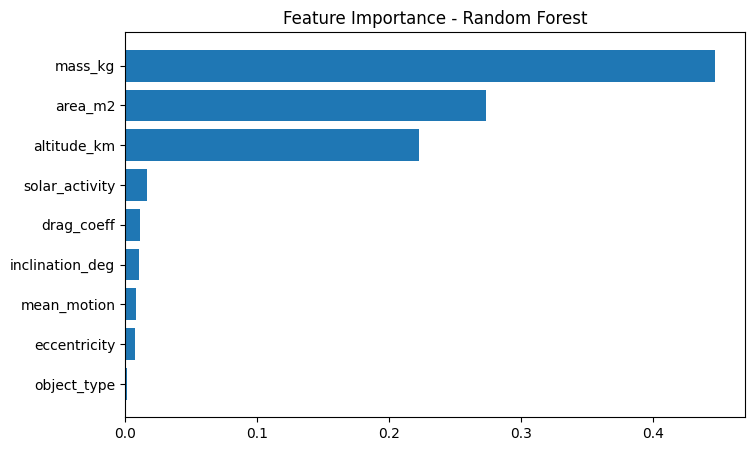

In [21]:
plt.figure(figsize=(8,5))
plt.barh(fi["Feature"], fi["Importance"])
plt.title("Feature Importance - Random Forest")
plt.gca().invert_yaxis()
plt.show()


# ## Step 9: Conclusion

This project demonstrates a machine learning approach to predicting the orbital decay time of space debris using physics-inspired features. A baseline Linear Regression model was used for comparison, followed by a Random Forest Regressor which significantly improved performance by capturing non-linear relationships.

Feature importance analysis revealed that mass, cross-sectional area, and orbital altitude are the dominant factors influencing decay time, aligning well with real-world orbital mechanics. The final model can be integrated into an interactive application for real-time decay prediction and risk assessment.
